(ex-likert-notebook)=
# ✏️ Esercizi 

In [1]:
source("../_common.R")

## Scaling Likert dei dati del questionario ordinale, creazione di un punteggio totale e scaling normativo

Il *Strengths and Difficulties Questionnaire* (SDQ) è un breve questionario di screening comportamentale riguardante bambini e adolescenti di età compresa tra 3 e 16 anni. Esiste in diverse versioni consultabili su http://www.sdqinfo.org/. Dal sito è possibile scaricare il questionario, il metodo di scoring e le norme del test.

La versione autovalutativa (SDQ Pupil) include 25 item che misurano 5 scale (faccette), con 5 item ciascuna:

- Sintomi Emotivi	somatico	preoccupazioni	triste	attaccamento	paura
- Problemi di Condotta	scatti	ubbidisce*	litiga	mente	ruba
- Iperattività	irrequietezza	agitato	distratto	riflessivo*	attento*
- Problemi con i Peer	solitario	amico*	popolare*	vittima di bullismo	vecchio migliore amico
- Pro-sociale	prendersi cura	condivide	gentilezza	aiuta

Ai partecipanti viene chiesto di valutare ciascuna domanda utilizzando le seguenti opzioni di risposta: 0 = "Non vero" 1 = "Un po' vero" 2 = "Certamente vero"

NOTA che alcuni item del SDQ sono *reverse*: item a punteggio invertito -- punteggi più alti della scala corrispondono a punteggi inferiori degli item. Ad esempio, l'item "Di solito faccio quello che mi dicono" (variabile ubbidisce) è reverse dei Problemi di Condotta. Ci sono 5 item di questo tipo nel SDQ; sono contrassegnati nella tabella sopra con asterischi (*).

I partecipanti a questo studio sono alunni di seconda media della stessa scuola (N=228). Si tratta di un campione di comunità e non ci aspettiamo che molti bambini abbiano punteggi al di sopra delle soglie cliniche. Il SDQ è stato somministrato due volte, la prima volta quando i bambini hanno appena iniziato la scuola secondaria (erano in anno 7), e un anno dopo (erano in anno 8).

## Emotional Symptoms scale

Questa scala non contiene item reverse.

Importiamo i dati in R.

In [2]:
load("../data/data_sdq/SDQ.RData")
glimpse(SDQ)

Rows: 228
Columns: 51
$ Gender   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ consid   <dbl> 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2…
$ restles  <dbl> 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 0…
$ somatic  <dbl> 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1…
$ shares   <dbl> 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2…
$ tantrum  <dbl> 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0…
$ loner    <dbl> 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0…
$ obeys    <dbl> 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2…
$ worries  <dbl> 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0…
$ caring   <dbl> 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2…
$ fidgety  <dbl> 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0…
$ friend   <dbl> 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2…
$ fights   <dbl> 0

Selezioniamo solo gli item della Emotional Symptoms scale.

In [3]:
items_emotion <- c("somatic", "worries", "unhappy", "clingy", "afraid")
sdq_emo <- SDQ[, items_emotion]  
sdq_emo |>
    head()

somatic,worries,unhappy,clingy,afraid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,1,0,1,0
2,0,0,1,0
0,0,0,0,1
0,0,0,1,1
2,1,0,1,0
1,0,0,1,0


Calcoliamo il punteggio della scala.

In [4]:
rowSums(sdq_emo)

[1]  4  3  1  2  4  2  4  0  1  1  0  8  2  3  7  4  5  2  8  6  1  4  9  4  5
 [26]  9  0  3  3  1  0  2  6  3  9  4  4  0  7  1  3  6  4  5  4  1  4  1  0  5
 [51]  1  2  2  4  4  4  6  1  8  3  2  2  4  1  1  0  2  2  7  5  0 NA NA  1  1
 [76]  7  4  1  8  3  5  0  5  4  0  1  1  5  3  6  1  3  2  6  6  0  2  4  5  3
[101]  3  1  1  7  2  3  5  5 NA  0  4  0  4  1  1  1  1  0  2  7  0  3  8  4  6
[126] NA  2  4  7  1  0  0  1  0  4  3  0 10  5  2  1  6  1  2  1  0  1 NA  4  4
[151]  2  4  7  5  6  1  0  5  3  1  3  3  6  4  2  3  1  0  3  3  0  3  0  0  0
[176]  2  2  2  0  1  5  3  3  1  4  3  1  6  2  4  2 NA  0  2  5  5  0  2  2  3
[201]  4  0  2  4  2  2  1  3  2  0  1  0  0  8  1  1  2  1  2  2  4  0  0  1  2
[226]  2  1  6

Notiamo che ci sono diversi punteggi mancanti, denotati da NA.

Un primo metodo per affrontare i dati mancanti è semplicemente quello di ignorarli:

In [5]:
rowSums(sdq_emo, na.rm = TRUE)

[1]  4  3  1  2  4  2  4  0  1  1  0  8  2  3  7  4  5  2  8  6  1  4  9  4  5
 [26]  9  0  3  3  1  0  2  6  3  9  4  4  0  7  1  3  6  4  5  4  1  4  1  0  5
 [51]  1  2  2  4  4  4  6  1  8  3  2  2  4  1  1  0  2  2  7  5  0  2  7  1  1
 [76]  7  4  1  8  3  5  0  5  4  0  1  1  5  3  6  1  3  2  6  6  0  2  4  5  3
[101]  3  1  1  7  2  3  5  5  4  0  4  0  4  1  1  1  1  0  2  7  0  3  8  4  6
[126]  0  2  4  7  1  0  0  1  0  4  3  0 10  5  2  1  6  1  2  1  0  1  4  4  4
[151]  2  4  7  5  6  1  0  5  3  1  3  3  6  4  2  3  1  0  3  3  0  3  0  0  0
[176]  2  2  2  0  1  5  3  3  1  4  3  1  6  2  4  2  4  0  2  5  5  0  2  2  3
[201]  4  0  2  4  2  2  1  3  2  0  1  0  0  8  1  1  2  1  2  2  4  0  0  1  2
[226]  2  1  6

Tuttavia, questa non è una buona idea. Anche per il fatto che, in questo modo non verrà calcolato il punteggio totale di 7 partecipanti. Possiamo identificare le colonne in cui ci sono dei valori mancanti usando `summary()`.

In [6]:
summary(sdq_emo)

    somatic          worries          unhappy           clingy      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.6106   Mean   :0.6211   Mean   :0.3172   Mean   :0.8421  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :2.0000   Max.   :2.0000   Max.   :2.0000   Max.   :2.0000  
 NA's   :2        NA's   :1        NA's   :1                        
     afraid    
 Min.   :0.00  
 1st Qu.:0.00  
 Median :0.00  
 Mean   :0.48  
 3rd Qu.:1.00  
 Max.   :2.00  
 NA's   :3     

In [7]:
sdq_emo <- sdq_emo %>%
    mutate_at(vars(somatic:afraid), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .))

Questa istruzione utilizza la funzione `mutate_at` del pacchetto dplyr per applicare una trasformazione a colonne specifiche (da `somatic` a `afraid`). All'interno della funzione di trasformazione, essa controlla se ogni valore è mancante (`NA`). Se lo è, lo sostituisce con la media della colonna usando `mean(., na.rm = TRUE)`, che calcola la media escludendo eventuali valori mancanti. 

Possiamo ora calcolare il punteggio della scala per ciascun partecipante.

In [8]:
SDQ$s_emotion <- rowSums(sdq_emo)
SDQ$s_emotion

[1]  4.0000000  3.0000000  1.0000000  2.0000000  4.0000000  2.0000000
  [7]  4.0000000  0.0000000  1.0000000  1.0000000  0.0000000  8.0000000
 [13]  2.0000000  3.0000000  7.0000000  4.0000000  5.0000000  2.0000000
 [19]  8.0000000  6.0000000  1.0000000  4.0000000  9.0000000  4.0000000
 [25]  5.0000000  9.0000000  0.0000000  3.0000000  3.0000000  1.0000000
 [31]  0.0000000  2.0000000  6.0000000  3.0000000  9.0000000  4.0000000
 [37]  4.0000000  0.0000000  7.0000000  1.0000000  3.0000000  6.0000000
 [43]  4.0000000  5.0000000  4.0000000  1.0000000  4.0000000  1.0000000
 [49]  0.0000000  5.0000000  1.0000000  2.0000000  2.0000000  4.0000000
 [55]  4.0000000  4.0000000  6.0000000  1.0000000  8.0000000  3.0000000
 [61]  2.0000000  2.0000000  4.0000000  1.0000000  1.0000000  0.0000000
 [67]  2.0000000  2.0000000  7.0000000  5.0000000  0.0000000  2.4800000
 [73]  7.6211454  1.0000000  1.0000000  7.0000000  4.0000000  1.0000000
 [79]  8.0000000  3.0000000  5.0000000  0.0000000  5.0000000  4.0000000
 [85]  0.0000000  1.0000000  1.0000000  5.0000000  3.0000000  6.0000000
 [91]  1.0000000  3.0000000  2.0000000  6.0000000  6.0000000  0.0000000
 [97]  2.0000000  4.0000000  5.0000000  3.0000000  3.0000000  1.0000000
[103]  1.0000000  7.0000000  2.0000000  3.0000000  5.0000000  5.0000000
[109]  5.0906195  0.0000000  4.0000000  0.0000000  4.0000000  1.0000000
[115]  1.0000000  1.0000000  1.0000000  0.0000000  2.0000000  7.0000000
[121]  0.0000000  3.0000000  8.0000000  4.0000000  6.0000000  0.3171806
[127]  2.0000000  4.0000000  7.0000000  1.0000000  0.0000000  0.0000000
[133]  1.0000000  0.0000000  4.0000000  3.0000000  0.0000000 10.0000000
[139]  5.0000000  2.0000000  1.0000000  6.0000000  1.0000000  2.0000000
[145]  1.0000000  0.0000000  1.0000000  4.4800000  4.0000000  4.0000000
[151]  2.0000000  4.0000000  7.0000000  5.0000000  6.0000000  1.0000000
[157]  0.0000000  5.0000000  3.0000000  1.0000000  3.0000000  3.0000000
[163]  6.0000000  4.0000000  2.0000000  3.0000000  1.0000000  0.0000000
[169]  3.0000000  3.0000000  0.0000000  3.0000000  0.0000000  0.0000000
[175]  0.0000000  2.0000000  2.0000000  2.0000000  0.0000000  1.0000000
[181]  5.0000000  3.0000000  3.0000000  1.0000000  4.0000000  3.0000000
[187]  1.0000000  6.0000000  2.0000000  4.0000000  2.0000000  4.6106195
[193]  0.0000000  2.0000000  5.0000000  5.0000000  0.0000000  2.0000000
[199]  2.0000000  3.0000000  4.0000000  0.0000000  2.0000000  4.0000000
[205]  2.0000000  2.0000000  1.0000000  3.0000000  2.0000000  0.0000000
[211]  1.0000000  0.0000000  0.0000000  8.0000000  1.0000000  1.0000000
[217]  2.0000000  1.0000000  2.0000000  2.0000000  4.0000000  0.0000000
[223]  0.0000000  1.0000000  2.0000000  2.0000000  1.0000000  6.0000000

Un istogramma si ottiene nel modo seguente.

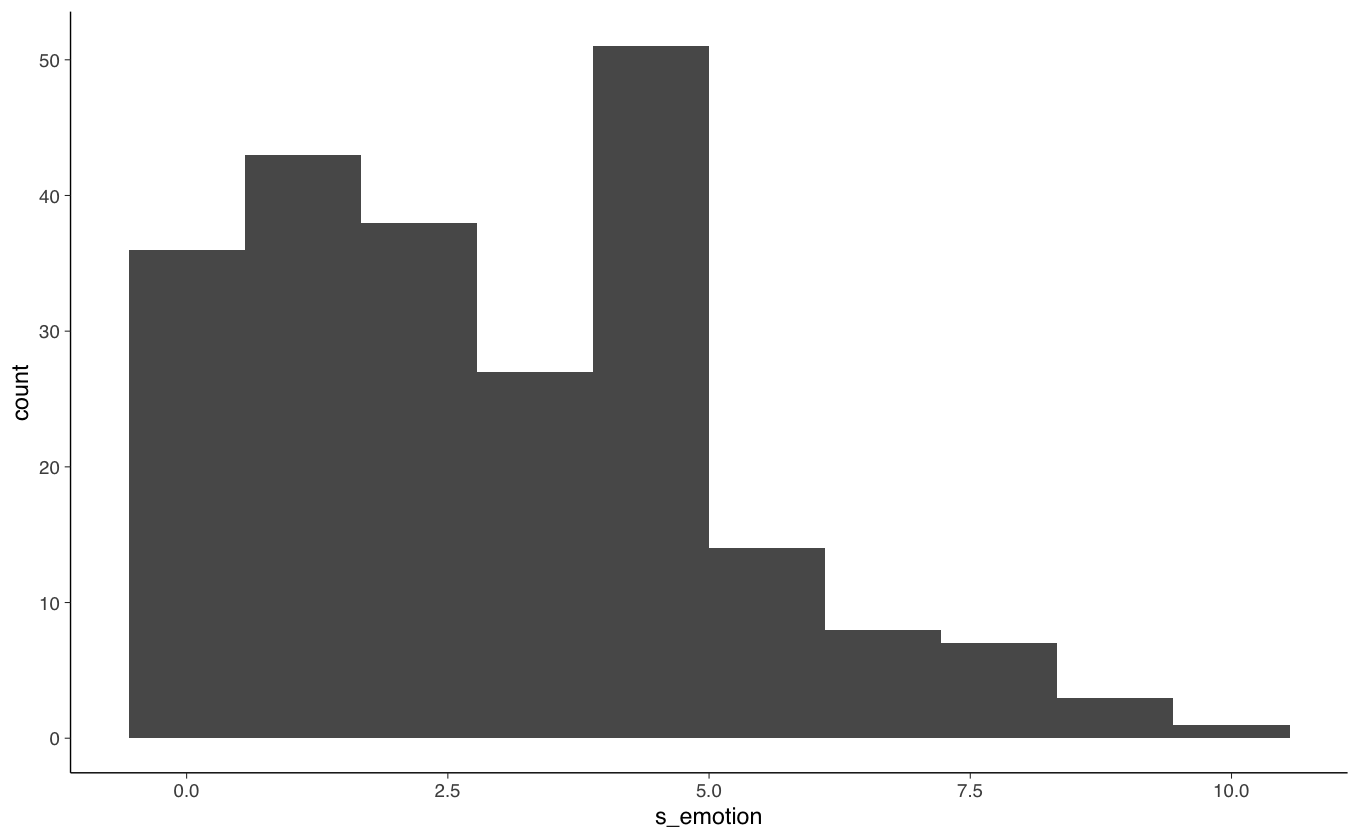

In [9]:
p <- SDQ |>
    ggplot(aes(x = s_emotion)) +
    geom_histogram(bins = 10)
p

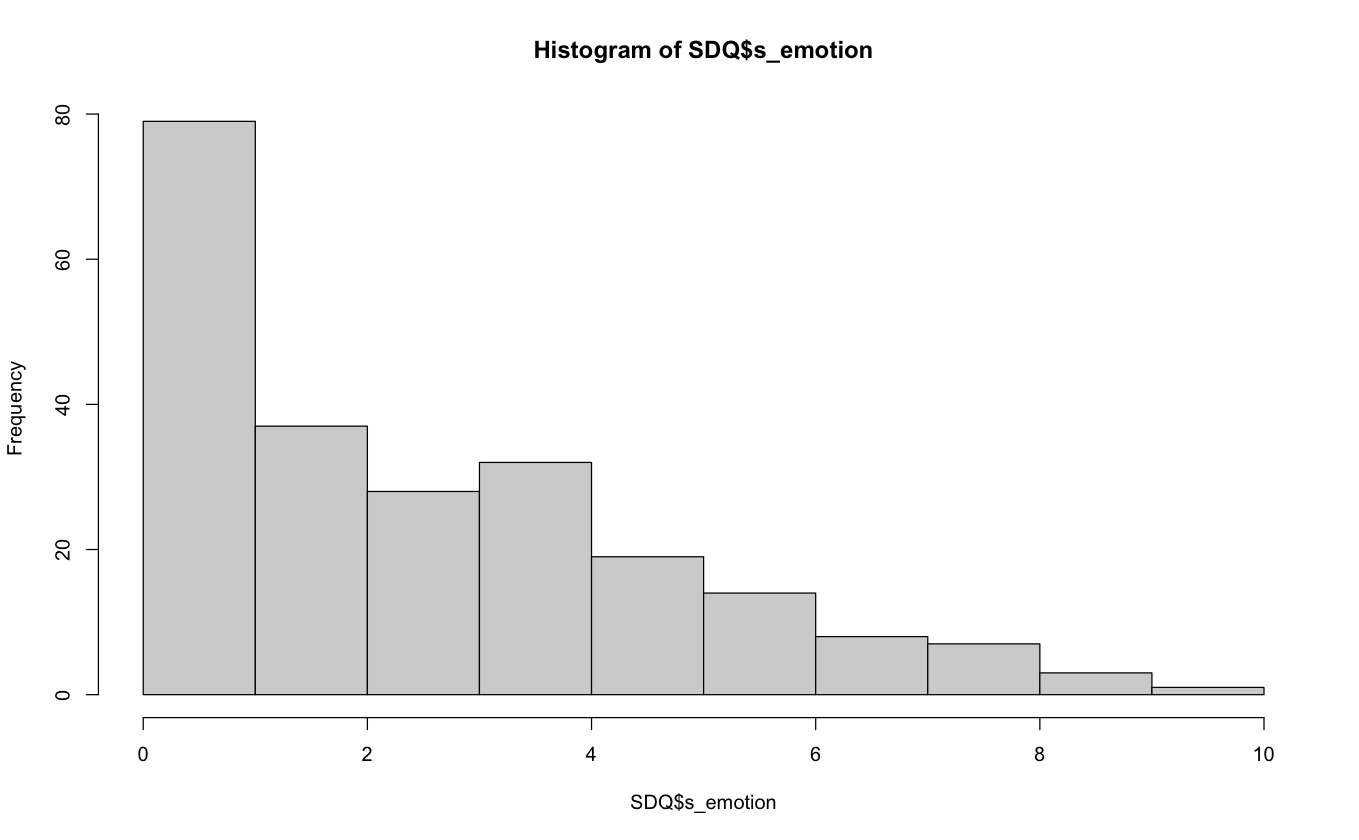

In [10]:
hist(SDQ$s_emotion)

Più utile è un KDE plot.

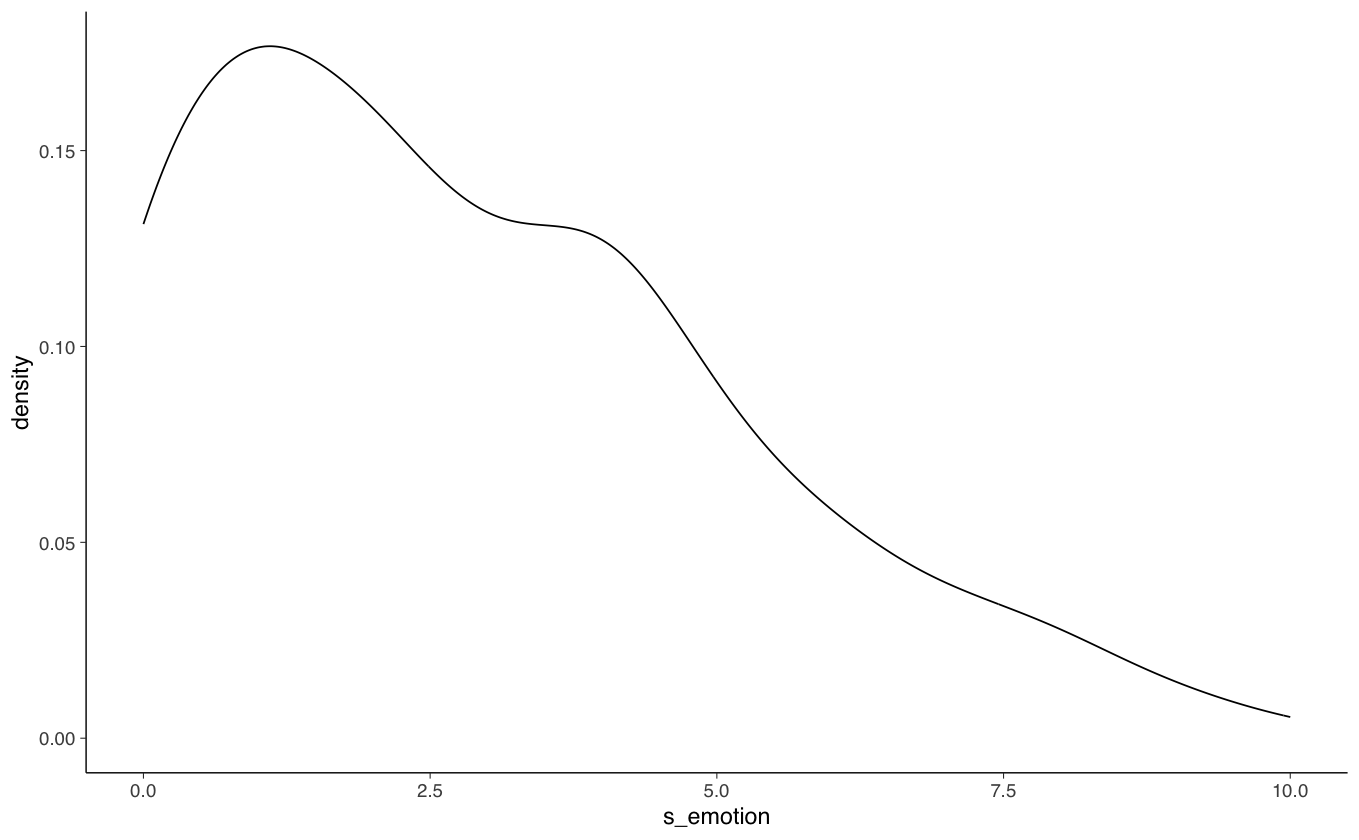

In [11]:
p <- SDQ |>
    ggplot(aes(x = s_emotion)) +
    geom_density()
p

Possiamo ottenere le statistiche descrittive della scala usando la funzione `describe` del pacchetto `psych`.

In [12]:
describe(SDQ$s_emotion)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,228,2.871051,2.308943,2,2.652057,2.9652,0,10,10,0.7163348,-0.1515175,0.1529135


Come si può vedere, la mediana (il punteggio al di sotto del quale si trova la metà del campione) di `s_emotion` è 2, mentre la media è più alta e pari a 2.87. Questo perché la distribuione dei punteggi è asimmetrica positiva; in questo caso, la mediana è più rappresentativa della tendenza centrale. Queste statistiche sono coerenti con la nostra osservazione dell'istogramma, che mostra un forte *floor effect*.

Di seguito sono riportati i valori di soglia per i casi "Normali", "Borderline" e "Anormali" per i Sintomi Emotivi forniti dal publisher del test (vedi https://sdqinfo.org/). Questi sono i punteggi che distinguono i casi probabilmente borderline e anormali dai casi "normali".

Normale: 0-5
Borderline: 6
Anormale: 7-10

In [13]:
table(SDQ$s_emotion <= 5)


FALSE  TRUE 
   33   195 

In questo campione, dunque, l'85% dei partecipanti è classificato nell'intervallo Normale.

In [14]:
table(SDQ$s_emotion <= 5)[2] / length(SDQ$s_emotion)

TRUE 
0.8552632

In maniera equivalente otteniamo 

In [15]:
table(SDQ$s_emotion == 6)[2] / length(SDQ$s_emotion)

TRUE 
0.05701754

In [16]:
table(SDQ$s_emotion >= 7)[2] / length(SDQ$s_emotion)

TRUE 
0.08333333

## Item reverse

La scala *Conduct Problems* contiene item reverse. Esaminiamo lo scoring di questo tipo di item.

In [17]:
items_conduct <- c("tantrum", "obeys", "fights", "lies", "steals")

Per i Problemi di Condotta, abbiamo solo un item reverse, `obeys`. 

```
tantrum    obeys*      fights       lies       steals
```

Per invertire il codice di questo item, useremo una funzione dedicata del pacchetto psych, `reverse.code()`. Questa funzione ha la forma generale `reverse.code(keys, items,…)`. L'argomento `keys` è un vettore di valori 1 o -1, dove -1 implica l'inversione dell'item. L'argomento `items` sono i nomi delle variabili che vogliamo valutare. 

In [18]:
R_conduct <- reverse.code(keys = c(1, -1, 1, 1, 1), SDQ[, items_conduct]) |> as.data.frame()
R_conduct |> head()

,tantrum,obeys-,fights,lies,steals
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,1,2,0,2,0
6,0,0,0,0,0


In [19]:
SDQ[, items_conduct] |> head()

tantrum,obeys,fights,lies,steals
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2,0,0,0
0,2,0,0,0
0,2,0,0,0
0,2,0,0,0
1,0,0,2,0
0,2,0,0,0


Anche in questo caso ci sono dei dati mancanti.

In [20]:
summary(R_conduct)

    tantrum           obeys-           fights           lies       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.0000   Median :1.0000   Median :0.000   Median :0.0000  
 Mean   :0.5708   Mean   :0.5789   Mean   :0.193   Mean   :0.5442  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.000   3rd Qu.:1.0000  
 Max.   :2.0000   Max.   :2.0000   Max.   :2.000   Max.   :2.0000  
 NA's   :2                                         NA's   :2       
     steals     
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 Mean   :0.185  
 3rd Qu.:0.000  
 Max.   :2.000  
 NA's   :1      

In [21]:
R_conduct <- R_conduct %>%
    mutate_at(vars(tantrum:steals), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .))

Calcoliamo ora il punteggio totale.

In [22]:
SDQ$s_conduct <- rowMeans(R_conduct)

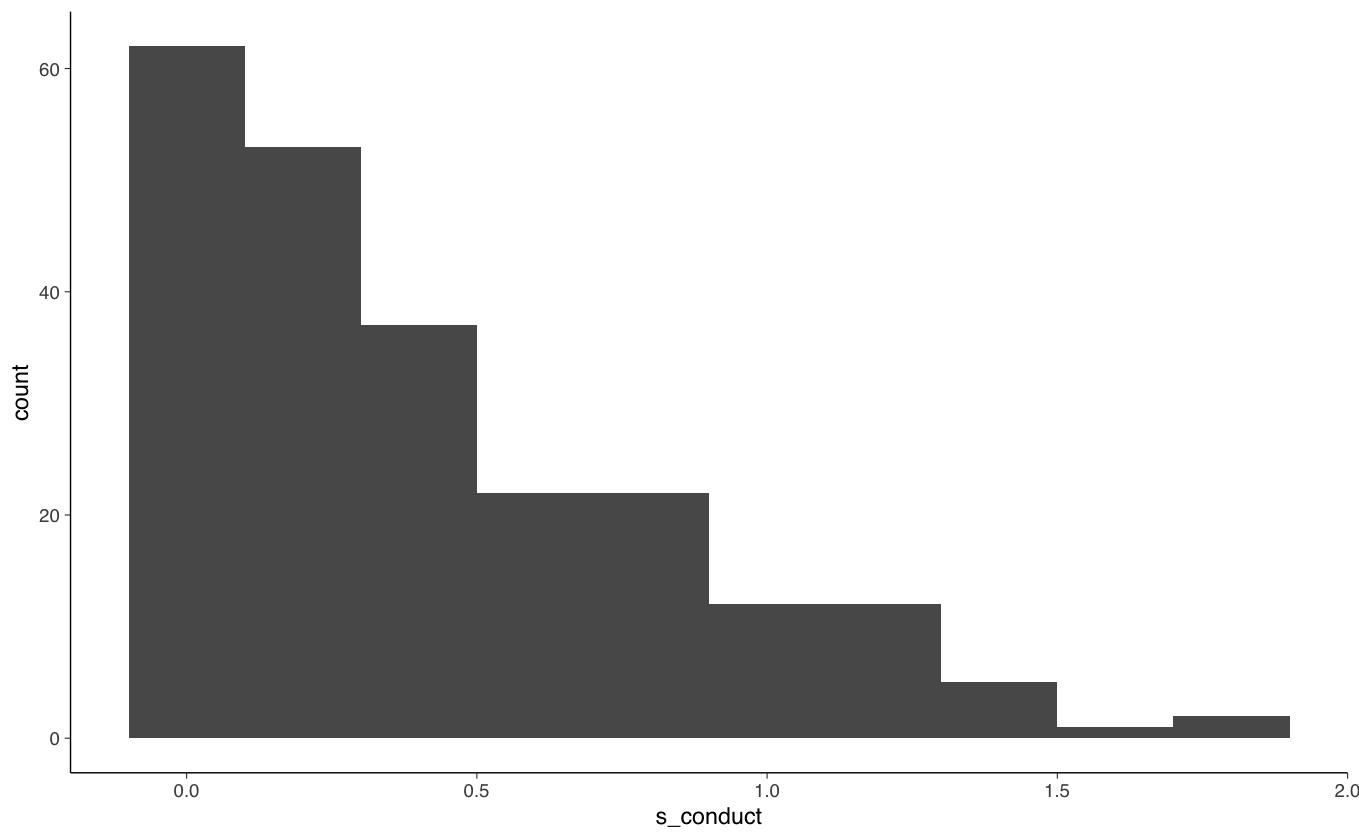

In [23]:
p <- SDQ |>
    ggplot(aes(x = s_conduct)) +
    geom_histogram(bins = 10)
p

## Session Info

In [24]:
sessionInfo() 

R version 4.3.2 (2023-10-31)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C/UTF-8/C/C/C/C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggokabeito_0.1.0  viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0     
 [5] ggExtra_0.10.1    bayesplot_1.11.0  gridExtra_2.3     patchwork_1.2.0  
 [9] semTools_0.5-6    semPlot_1.1.6     lavaan_0.6-17     psych_2.4.1      
[13] scales_1.3.0      markdown_1.12     knitr_1.45        lubridate_1.9.3  
[17] forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4       purrr_1.0.2      
[21] readr_2.1.5       tidyr_1.3.1       tibble_3.2.1      ggplot2_3.4.4    